In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df = df.drop(['Unnamed: 32'],axis=1)

In [4]:
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [5]:
df['diagnosis'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [6]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
n_cols = X_train.shape[1]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
model = Sequential()
model.add(Dense(50, activation = 'relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(25, activation = 'relu',))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(11, activation = 'relu',))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, mode='min')

In [12]:
result = model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=128, 
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/100
4/4 [==============================] - 1s 68ms/step - loss: 0.7699 - accuracy: 0.5231 - val_loss: 0.6837 - val_accuracy: 0.6140
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6489 - accuracy: 0.6066 - val_loss: 0.6829 - val_accuracy: 0.5614
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5579 - accuracy: 0.7165 - val_loss: 0.6819 - val_accuracy: 0.5351
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5167 - accuracy: 0.7560 - val_loss: 0.6800 - val_accuracy: 0.5263
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.4748 - accuracy: 0.7824 - val_loss: 0.6775 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4411 - accuracy: 0.8418 - val_loss: 0.6740 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3975 - accuracy: 0.8593 - val_loss: 0.6698 - val_accuracy: 0.4825
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 26ms/step - loss: 0.1130 - accuracy: 0.9670 - val_loss: 0.1411 - val_accuracy: 0.9386
Epoch 60/100
4/4 [==============================] - 0s 31ms/step - loss: 0.0761 - accuracy: 0.9824 - val_loss: 0.1369 - val_accuracy: 0.9386
Epoch 61/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0792 - accuracy: 0.9846 - val_loss: 0.1339 - val_accuracy: 0.9386
Epoch 62/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0853 - accuracy: 0.9648 - val_loss: 0.1280 - val_accuracy: 0.9474
Epoch 63/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0767 - accuracy: 0.9868 - val_loss: 0.1224 - val_accuracy: 0.9561
Epoch 64/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0743 - accuracy: 0.9802 - val_loss: 0.1185 - val_accuracy: 0.9561
Epoch 65/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0886 - accuracy: 0.9692 - val_loss: 0.1181 - val_accuracy: 0.9561
Epoch 66/100
4/4 [========

In [13]:
loss_df = pd.DataFrame(model.history.history)

In [14]:
import matplotlib.pyplot as plt

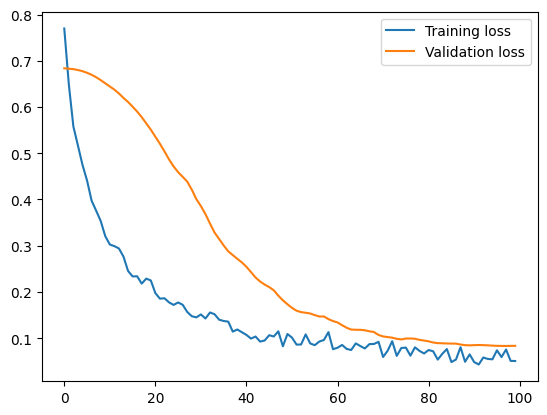

In [15]:
plt.plot(loss_df['loss'], label='Training loss')
plt.plot(loss_df['val_loss'], label='Validation loss')
plt.legend()

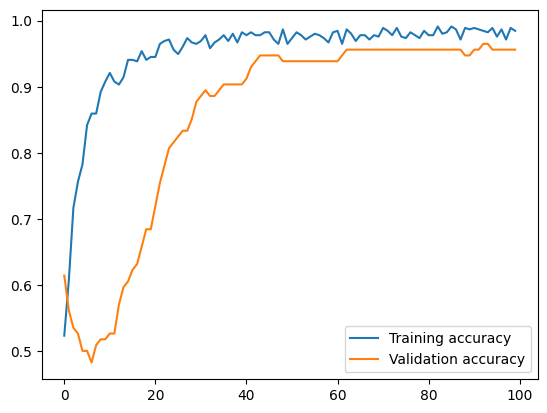

In [16]:
plt.plot(loss_df['accuracy'], label='Training accuracy')
plt.plot(loss_df['val_accuracy'], label='Validation accuracy')
plt.legend()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
y_pred = model.predict(X_test)
y_pred = y_pred.round()

4/4 [==============================] - 0s 5ms/step


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

